In [14]:
from kan.utils import create_dataset
import torch
import matplotlib.pyplot as plt
f = lambda x: (x[:, [0]] + x[:, [1]]) / (1 + x[:, [0]] * x[:, [1]])
dataset = create_dataset(f, n_var=2, ranges=[-0.9, 0.9])

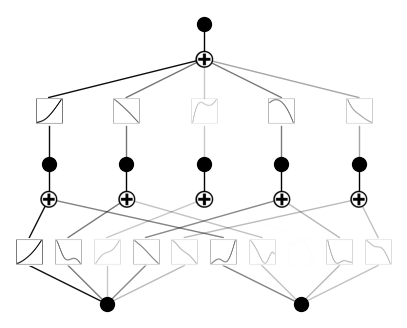

In [15]:
model(dataset['train_input']);
model.plot()

In [16]:
model.fit(dataset, steps=1000)

| train_loss: 2.84e-03 | test_loss: 3.24e-03 | reg: 1.69e+01 | : 100%|█| 1000/1000 [00:50<00:00, 19.


saving model version 0.2


{'train_loss': [array(0.11136039, dtype=float32),
  array(0.06374481, dtype=float32),
  array(0.03922357, dtype=float32),
  array(0.0290044, dtype=float32),
  array(0.02175305, dtype=float32),
  array(0.02057244, dtype=float32),
  array(0.01833864, dtype=float32),
  array(0.01632044, dtype=float32),
  array(0.01405467, dtype=float32),
  array(0.01299194, dtype=float32),
  array(0.01128906, dtype=float32),
  array(0.01055062, dtype=float32),
  array(0.01013356, dtype=float32),
  array(0.00986032, dtype=float32),
  array(0.0096381, dtype=float32),
  array(0.00940815, dtype=float32),
  array(0.0089934, dtype=float32),
  array(0.00866066, dtype=float32),
  array(0.00848096, dtype=float32),
  array(0.00817875, dtype=float32),
  array(0.00811604, dtype=float32),
  array(0.00797153, dtype=float32),
  array(0.00784762, dtype=float32),
  array(0.00768953, dtype=float32),
  array(0.00758554, dtype=float32),
  array(0.00749923, dtype=float32),
  array(0.00733747, dtype=float32),
  array(0.0071134

In [17]:
X_test, y_test = dataset['test_input'], dataset['test_label']

with torch.no_grad():
    y_pred = model(X_test)

# Mean Squared Error
mse = torch.mean((y_pred - y_test) ** 2).item()
print(f"Test MSE: {mse:.6f}")

Test MSE: 0.000011


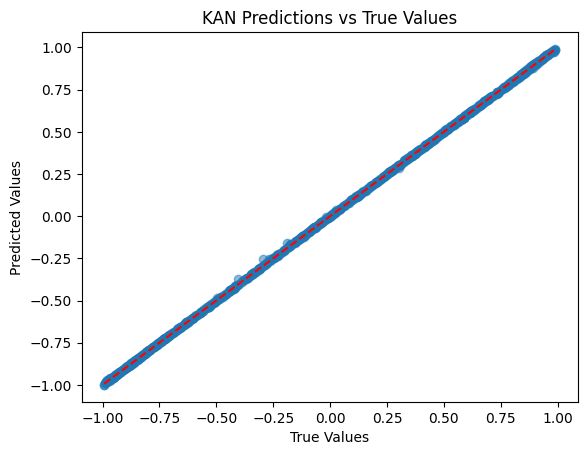

In [18]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("KAN Predictions vs True Values")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')  # Perfect prediction line
plt.show()
